In [56]:
import pandas as pd #untuk manipulasi dan analisis data.
from sklearn.model_selection import train_test_split #membagi data untuk training dan testing model.
from sklearn.preprocessing import StandardScaler, LabelEncoder #mempersiapkan data agar optimal untuk model machine learning.
from sklearn.svm import SVC, SVR #algoritma untuk klasifikasi.
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score #untuk mengevaluasi performa model.
import matplotlib.pyplot as plt #untuk visualisasi data dan hasil.
from sklearn.preprocessing import OneHotEncoder #untuk mengubah fitur kategorikal
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #untuk mengevaluasi model regresi

## Load the dataset

In [ ]:
df = pd.read_csv('/content/CreditDataset.csv')
#menampilkan dataset

df.head()
#menampilkan 5 Baris Pertama Dataset

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
df.info()
#memberikan informasi pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


## Preprocessing Data

In [ ]:
# Assuming df holds your dataframe
X = df.copy() # Create a copy of the dataframe and assign it to X
y = X.pop('Class') # Remove the 'Class' column from X and assign it to y
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
#identifikasi kolom kategorikal dan numerik

In [ ]:
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()
#mendapatkan kolom numerik dengan mengecualikan tipe data 'object'

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#membuat objek OneHotEncoder untuk fitur kategorikal

In [ ]:
encoded_data = encoder.fit_transform(X[categorical_cols])
#melakukan fit dan transformasi pada data kategorikal

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
#membuat DataFrame untuk data hasil encoding

In [ ]:
X = pd.concat([X[numerical_cols], encoded_df], axis=1)
#menggabungkan data numerik asli dengan data hasil encoding secara horizontal

In [ ]:
scaler = StandardScaler()
#membuat objek StandardScaler untuk menormalisasi fitur menggunakan StandardScaler

In [ ]:
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
#melakukan fit dan transformasi pada fitur numerik

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#membagi dataset menjadi data latih dan uji

## Membuat model SVM

In [ ]:
svr_model = SVR(kernel='linear', C=1.0)
#melatih model SVR dan membuat model SVR dengan kernel linear

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Assuming 'X' is your DataFrame containing features and 'y' is your target variable

# 1. Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# 2. Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 3. One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with SVR
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# 4. Concatenate numerical and encoded features
X = pd.concat([X[numerical_cols], encoded_df], axis=1)

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the SVR model
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train, y_train) # Now X_train should contain only numerical data

SVR(kernel='linear')

## Regression report

In [54]:
y_pred = svr_model.predict(X_test)
#membuat prediksi pada data uji

In [57]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#menghitung metrik evaluasi

In [58]:
regression_report = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "R-squared (R2)": r2
}
#membuat laporan regresi

In [59]:
print("Regression Report:")
for metric, value in regression_report.items():
    print(f"{metric}: {value:.4f}")
#menampilkan laporan regresi

Regression Report:
Mean Squared Error (MSE): 0.1787
Mean Absolute Error (MAE): 0.3077
R-squared (R2): 0.1409


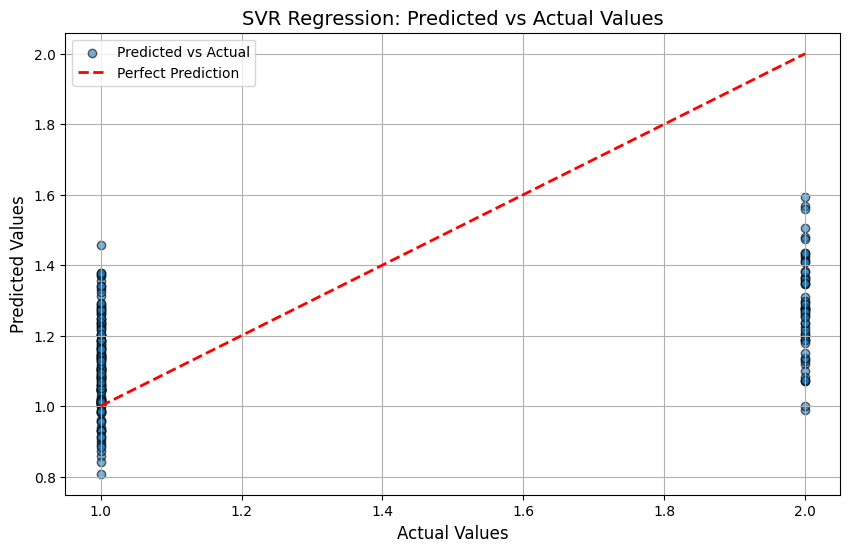

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.title("SVR Regression: Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
#menampilkan nilai aktual vs prediksi

- Distribusi Prediksi: Sebagian besar prediksi model SVR terkonsentrasi di dua area utama, yaitu di sekitar nilai aktual 1 dan 2.
- Kecenderungan Model:Model cenderung memberikan prediksi yang seragam untuk target tertentu.
- Kesalahan Prediksi:Banyak prediksi yang tidak mendekati garis referensi "Perfect Prediction," yang menandakan adanya penyimpangan dari kesesuaian ideal.
- Interpretasi: Penyimpangan ini menunjukkan bahwa model kesulitan menangkap hubungan yang kompleks antara fitur dan target.